<a href="https://colab.research.google.com/github/Purvsoni/132_PurvSoni/blob/main/Lab2/132_lab2_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [4]:
temp_dataset = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/ML/Lab2/Exercise-CarData.csv")
temp_dataset[temp_dataset['KM'] == '??']

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
6,6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
64,64,17950,27.0,??,Petrol,97,1.0,0,1400,5,1110
91,91,22250,20.0,??,Diesel,90,1.0,0,2000,3,1260
112,112,24950,8.0,??,Diesel,116,1.0,0,2000,5,1320
125,125,21750,16.0,??,Petrol,110,1.0,0,1600,5,1130
131,131,15950,20.0,??,Petrol,97,1.0,0,1400,5,1110
398,398,10500,55.0,??,Petrol,110,1.0,0,1600,4,1035
491,491,10750,54.0,??,Petrol,110,1.0,0,1600,5,1075
1049,1049,6750,77.0,??,Diesel,72,1.0,0,2000,4,1100
1120,1120,7350,72.0,??,Petrol,86,1.0,0,1300,3,1015


In [ ]:
temp_dataset[temp_dataset['HP'] == '????']

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
6,6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
9,9,12950,23.0,71138,Diesel,????,NaN,0,1900,3,1105
15,15,22000,28.0,18739,Petrol,????,0.0,0,1800,3,1185
631,631,8950,67.0,127000,Diesel,????,1.0,0,2000,5,1135
638,638,10450,64.0,120400,NaN,????,0.0,0,1600,5,1090
1245,1245,7990,77.0,80486,Petrol,????,1.0,0,1600,5,1070


**Observation**
- As we can see few dataframe contains inappropriate data which needs to be handled while preprocessing.
- The best way is to replace all such values by NaN.
- So, we will use na_values attritube in pd.read()

In [6]:
dataset = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/ML/Lab2/Exercise-CarData.csv", na_values = ['??', '????']) 
print("Number of rows and columns:", dataset.shape)
dataset.head()

Number of rows and columns: (1436, 11)


,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [ ]:
dataset.columns.tolist()

['Unnamed: 0',
 'Price',
 'Age',
 'KM',
 'FuelType',
 'HP',
 'MetColor',
 'Automatic',
 'CC',
 'Doors',
 'Weight']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1421 non-null   float64
 4   FuelType    1336 non-null   object 
 5   HP          1430 non-null   float64
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 123.5+ KB


In [ ]:
dataset.drop('Unnamed: 0',axis = 1, inplace = True)

In [ ]:
dataset.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [ ]:
dataset['Doors'].unique()

array(['three', '3', '5', '4', 'four', 'five', '2'], dtype=object)

In [ ]:
dataset['Doors'] = dataset['Doors'].map({'three':3, '3':3, '5':5, '4':4, '2':2, 'four':4, 'five':5})
dataset['Doors'].unique()

array([3, 5, 4, 2], dtype=int64)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 112.3+ KB


### Handling null (missing) values

In [7]:
# droping rows with all null values

dataset.dropna(how = "all", inplace = True)
print("Number of rows and columns:", dataset.shape)

Number of rows and columns: (1436, 11)


In [8]:
dataset.describe()

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,717.500000,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,1072.45961
std,414.681806,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,52.64112
min,0.000000,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.00000
25%,358.750000,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,1040.00000
50%,717.500000,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,1070.00000
75%,1076.250000,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,1085.00000
max,1435.000000,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.00000


In [ ]:
dataset.describe(include = 'object')

,FuelType
count,1336
unique,3
top,Petrol
freq,1177


In [9]:
print("Unique Fuel Type values:",dataset['FuelType'].unique())
print("Count of each type:")
dataset['FuelType'].value_counts()

Unique Fuel Type values: ['Diesel' nan 'Petrol' 'CNG']
Count of each type:


Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [ ]:
dataset['FuelType'].fillna('Diesel', inplace = True)
print("Type of fuels:",dataset['FuelType'].unique())
print("Count of each type:")
dataset['FuelType'].value_counts()

Type of fuels: ['Diesel' 'Petrol' 'CNG']
Count of each type:


Petrol    1177
Diesel     244
CNG         15
Name: FuelType, dtype: int64

In [ ]:
#Let's do Label Encoding
le = LabelEncoder()
dataset['FuelType'] = le.fit_transform(dataset['FuelType'])
print("Unique Fuel Type values:",dataset['FuelType'].unique())
dataset.head(10)

Unique Fuel Type values: [1 2 0]


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,1,90.0,1.0,0,2000,3,1165
1,13750,23.0,72937.0,1,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,1,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,1,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,1,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,1,90.0,0.0,0,2000,3,1170
6,16900,27.0,NaN,1,NaN,NaN,0,2000,3,1245
7,18600,30.0,75889.0,1,90.0,1.0,0,2000,3,1245
8,21500,27.0,19700.0,2,192.0,0.0,0,1800,3,1185
9,12950,23.0,71138.0,1,NaN,NaN,0,1900,3,1105


 * Replacing all NaN values with respective mean using imputer

In [ ]:
dataset = dataset.reindex(columns = ['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 
                                     'Weight', 'Price'])
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

print("X:\n",X)
print("\n\nY:\n",Y)

imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")

X:
 [[2.3000e+01 4.6986e+04 1.0000e+00 ... 2.0000e+03 3.0000e+00 1.1650e+03]
 [2.3000e+01 7.2937e+04 1.0000e+00 ... 2.0000e+03 3.0000e+00 1.1650e+03]
 [2.4000e+01 4.1711e+04 1.0000e+00 ... 2.0000e+03 3.0000e+00 1.1650e+03]
 ...
 [       nan 1.7016e+04 2.0000e+00 ... 1.3000e+03 3.0000e+00 1.0150e+03]
 [7.0000e+01        nan 1.0000e+00 ... 1.3000e+03 3.0000e+00 1.0150e+03]
 [7.6000e+01 1.0000e+00 2.0000e+00 ... 1.6000e+03 5.0000e+00 1.1140e+03]]


Y:
 [13500 13750 13950 ...  8500  7250  6950]


In [ ]:
# Fitting the data, function learns the stats 
imputer = imputer.fit(X[:,:]) 
  
# fit_transform() will execute those stats on the input ie. X[:, 1:3] 
X[:,:] = imputer.transform(X[:,:]) 
  
# filling the missing value with mean 
print("\n\nNew Input with Mean Value for NaN : \n\n", X) 



New Input with Mean Value for NaN : 

 [[2.30000000e+01 4.69860000e+04 1.00000000e+00 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 [2.30000000e+01 7.29370000e+04 1.00000000e+00 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 [2.40000000e+01 4.17110000e+04 1.00000000e+00 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 ...
 [5.56721557e+01 1.70160000e+04 2.00000000e+00 ... 1.30000000e+03
  3.00000000e+00 1.01500000e+03]
 [7.00000000e+01 6.86472400e+04 1.00000000e+00 ... 1.30000000e+03
  3.00000000e+00 1.01500000e+03]
 [7.60000000e+01 1.00000000e+00 2.00000000e+00 ... 1.60000000e+03
  5.00000000e+00 1.11400000e+03]]


* Feature selection based on correlation

In [11]:
dataset_new = dataset.iloc[:,0:8]
dataset_new.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0


In [12]:
corr = dataset_new.corr()
corr.head(8)

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic
Unnamed: 0,1.000000,-0.738289,0.907090,0.279076,-0.108616,-0.078616,0.066299
Price,-0.738289,1.000000,-0.878407,-0.574720,0.309902,0.112041,0.033081
Age,0.907090,-0.878407,1.000000,0.512735,-0.157904,-0.099659,0.032573
KM,0.279076,-0.574720,0.512735,1.000000,-0.335285,-0.093825,-0.081248
HP,-0.108616,0.309902,-0.157904,-0.335285,1.000000,0.064749,0.013755
MetColor,-0.078616,0.112041,-0.099659,-0.093825,0.064749,1.000000,-0.013973
Automatic,0.066299,0.033081,0.032573,-0.081248,0.013755,-0.013973,1.000000


No two feature has high correlation (>=0.9) with other. So, we can't remove any attribute.

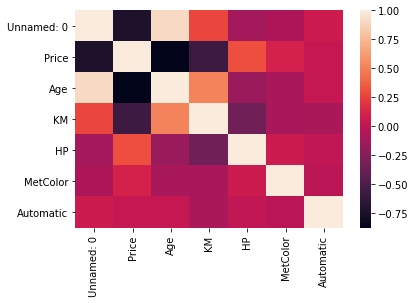

In [13]:
sns.heatmap(corr)